# 0. Comments
1일차 교육 후기

In [1]:
#from IPython.core.interactiveshell import InteractiveShell
#InteractiveShell.ast_node_interactivity = 'all'
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
plt.rcParams['font.family']='Malgun Gothic' # 한글폰트
import pandas as pd
import numpy as np

## 0.1 Text - Vectorization

In [2]:
dir_path = 'D:/Book_one_writing/data/'
tf = pd.read_pickle(dir_path+'4장3절자료.pkl')
tf.shape
tf.head(3)

,성별,연령,지역,직업,가구소득,학력,주거형태,결혼,자녀수,인터넷평일,...,모바일주말,모바일휴일,TV1,TV2,TV3,TV4,드라마1,드라마2,드라마3,구매
0,1,14.0,서울,학생재수생,6.0,중학교재학,월세,미혼,0.0,0.0,...,12.247449,13.416408,4,7.0,9.0,11.0,6.0,9.0,10.0,4.0
1,1,14.0,서울,학생재수생,6.0,중학교재학,자가,미혼,0.0,30.0,...,6.324555,6.324555,3,4.0,7.0,7.0,4.0,6.0,11.0,2.0
2,1,14.0,서울,학생재수생,6.0,중학교재학,전세,미혼,0.0,90.0,...,13.416408,13.416408,4,6.0,7.0,9.0,1.0,4.0,12.0,5.0


In [3]:
from sklearn.feature_extraction.text import CountVectorizer
tf['드라마'] = 0
drama_genre= tf[['드라마1', '드라마2', '드라마3']] 
for i, j in drama_genre.iterrows() :
    tf['드라마'][i] = [str(int(i)*10) for i in j.values]
tf.head(3)

,성별,연령,지역,직업,가구소득,학력,주거형태,결혼,자녀수,인터넷평일,...,모바일휴일,TV1,TV2,TV3,TV4,드라마1,드라마2,드라마3,구매,드라마
0,1,14.0,서울,학생재수생,6.0,중학교재학,월세,미혼,0.0,0.0,...,13.416408,4,7.0,9.0,11.0,6.0,9.0,10.0,4.0,"[60, 90, 100]"
1,1,14.0,서울,학생재수생,6.0,중학교재학,자가,미혼,0.0,30.0,...,6.324555,3,4.0,7.0,7.0,4.0,6.0,11.0,2.0,"[40, 60, 110]"
2,1,14.0,서울,학생재수생,6.0,중학교재학,전세,미혼,0.0,90.0,...,13.416408,4,6.0,7.0,9.0,1.0,4.0,12.0,5.0,"[10, 40, 120]"


In [4]:
choices = []
for i in tf['드라마']:
    choices.append(' '.join(i))

In [5]:
len(choices)
choices[0:10]
','.join(choices)[0:30]

'60 90 100,40 60 110,10 40 120,'

In [6]:
vectorizer = CountVectorizer()

In [7]:
X = vectorizer.fit_transform(choices)
X
X.toarray()

array([[0, 1, 0, ..., 0, 0, 1],
       [0, 0, 1, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [8]:
print(vectorizer.get_feature_names())

['10', '100', '110', '120', '130', '140', '150', '160', '20', '30', '40', '50', '60', '70', '80', '90']


In [9]:
vectorizer.vocabulary_.items()

dict_items([('60', 12), ('90', 15), ('100', 1), ('40', 10), ('110', 2), ('10', 0), ('120', 3), ('50', 11), ('80', 14), ('130', 4), ('20', 8), ('30', 9), ('140', 5), ('70', 13), ('150', 6), ('160', 7)])

In [10]:
cols = sorted(vectorizer.vocabulary_.items(), key=(lambda x:x[1]), reverse=False)
cols = ['drama' + str(int(int(i[0])/10)) for i in cols]
drama = pd.DataFrame(X.toarray(), columns =cols)
drama.head()

,drama1,drama10,drama11,drama12,drama13,drama14,drama15,drama16,drama2,drama3,drama4,drama5,drama6,drama7,drama8,drama9
0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1
1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0
2,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0


In [11]:
pd.merge(tf.drop(['드라마1', '드라마2', '드라마3'], axis=1), drama, left_index=True, right_index=True, how='left').head()

,성별,연령,지역,직업,가구소득,학력,주거형태,결혼,자녀수,인터넷평일,...,drama15,drama16,drama2,drama3,drama4,drama5,drama6,drama7,drama8,drama9
0,1,14.0,서울,학생재수생,6.0,중학교재학,월세,미혼,0.0,0.000000,...,0,0,0,0,0,0,1,0,0,1
1,1,14.0,서울,학생재수생,6.0,중학교재학,자가,미혼,0.0,30.000000,...,0,0,0,0,1,0,1,0,0,0
2,1,14.0,서울,학생재수생,6.0,중학교재학,전세,미혼,0.0,90.000000,...,0,0,0,0,1,0,0,0,0,0
3,1,14.0,서울,학생재수생,8.0,중학교재학,자가,미혼,0.0,68.876933,...,0,0,0,0,2,0,0,0,0,0
4,1,14.0,서울,학생재수생,9.0,중학교재학,자가,미혼,0.0,0.000000,...,0,0,0,0,1,1,0,0,0,0


## [Countvector](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html)

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]


vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names())

print(X.toarray())

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']
[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


In [13]:
pd.DataFrame(X.toarray(), columns= vectorizer.get_feature_names())

,and,document,first,is,one,second,the,third,this
0,0,1,1,1,0,0,1,0,1
1,0,2,0,1,0,1,1,0,1
2,1,0,0,1,1,0,1,1,1
3,0,1,1,1,0,0,1,0,1


## [Tfidfvector](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html)

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names())

print(X.shape)

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']
(4, 9)


In [15]:
pd.DataFrame(X.toarray(), columns= vectorizer.get_feature_names())

,and,document,first,is,one,second,the,third,this
0,0.000000,0.469791,0.580286,0.384085,0.000000,0.000000,0.384085,0.000000,0.384085
1,0.000000,0.687624,0.000000,0.281089,0.000000,0.538648,0.281089,0.000000,0.281089
2,0.511849,0.000000,0.000000,0.267104,0.511849,0.000000,0.267104,0.511849,0.267104
3,0.000000,0.469791,0.580286,0.384085,0.000000,0.000000,0.384085,0.000000,0.384085


## 0.2 Target mean encoding

In [16]:
df = pd.read_pickle(dir_path+'4장3절자료.pkl')
df.head()

,성별,연령,지역,직업,가구소득,학력,주거형태,결혼,자녀수,인터넷평일,...,모바일주말,모바일휴일,TV1,TV2,TV3,TV4,드라마1,드라마2,드라마3,구매
0,1,14.0,서울,학생재수생,6.0,중학교재학,월세,미혼,0.0,0.000000,...,12.247449,13.416408,4,7.0,9.0,11.0,6.0,9.0,10.0,4.0
1,1,14.0,서울,학생재수생,6.0,중학교재학,자가,미혼,0.0,30.000000,...,6.324555,6.324555,3,4.0,7.0,7.0,4.0,6.0,11.0,2.0
2,1,14.0,서울,학생재수생,6.0,중학교재학,전세,미혼,0.0,90.000000,...,13.416408,13.416408,4,6.0,7.0,9.0,1.0,4.0,12.0,5.0
3,1,14.0,서울,학생재수생,8.0,중학교재학,자가,미혼,0.0,68.876933,...,7.745967,7.745967,6,7.0,9.0,10.0,1.0,4.0,4.0,2.0
4,1,14.0,서울,학생재수생,9.0,중학교재학,자가,미혼,0.0,0.000000,...,13.416408,13.416408,4,7.0,9.0,7.0,4.0,5.0,10.0,3.0


In [17]:
df['target'] = 0
buy = df[((df['구매'] == 4) | (df['구매'] == 5) | (df['구매'] == 6))].index
df.loc[buy, 'target'] = 1
df.head(3)

,성별,연령,지역,직업,가구소득,학력,주거형태,결혼,자녀수,인터넷평일,...,모바일휴일,TV1,TV2,TV3,TV4,드라마1,드라마2,드라마3,구매,target
0,1,14.0,서울,학생재수생,6.0,중학교재학,월세,미혼,0.0,0.0,...,13.416408,4,7.0,9.0,11.0,6.0,9.0,10.0,4.0,1
1,1,14.0,서울,학생재수생,6.0,중학교재학,자가,미혼,0.0,30.0,...,6.324555,3,4.0,7.0,7.0,4.0,6.0,11.0,2.0,0
2,1,14.0,서울,학생재수생,6.0,중학교재학,전세,미혼,0.0,90.0,...,13.416408,4,6.0,7.0,9.0,1.0,4.0,12.0,5.0,1


In [18]:
df.groupby(['직업'])['target'].mean().to_dict()
target_mean = df.groupby(['직업'])['target'].mean().to_dict()
df['직업_targetmean'] = df['직업'].map(target_mean)
df.head()

,성별,연령,지역,직업,가구소득,학력,주거형태,결혼,자녀수,인터넷평일,...,TV1,TV2,TV3,TV4,드라마1,드라마2,드라마3,구매,target,직업_targetmean
0,1,14.0,서울,학생재수생,6.0,중학교재학,월세,미혼,0.0,0.000000,...,4,7.0,9.0,11.0,6.0,9.0,10.0,4.0,1,0.384309
1,1,14.0,서울,학생재수생,6.0,중학교재학,자가,미혼,0.0,30.000000,...,3,4.0,7.0,7.0,4.0,6.0,11.0,2.0,0,0.384309
2,1,14.0,서울,학생재수생,6.0,중학교재학,전세,미혼,0.0,90.000000,...,4,6.0,7.0,9.0,1.0,4.0,12.0,5.0,1,0.384309
3,1,14.0,서울,학생재수생,8.0,중학교재학,자가,미혼,0.0,68.876933,...,6,7.0,9.0,10.0,1.0,4.0,4.0,2.0,0,0.384309
4,1,14.0,서울,학생재수생,9.0,중학교재학,자가,미혼,0.0,0.000000,...,4,7.0,9.0,7.0,4.0,5.0,10.0,3.0,0,0.384309


In [19]:
df.직업_targetmean.value_counts(dropna=True)

0.384309    752
0.345845    746
0.353116    674
0.304085    661
0.399083    654
0.278571    280
0.269565    230
Name: 직업_targetmean, dtype: int64

## 확인 

In [20]:
print('The numbers of nan, inf & -inf:', df.isin([np.nan, np.inf, -np.inf]).any(1).sum())
dict(df.dtypes) == 'object'

The numbers of nan, inf & -inf: 0


False

## 교차검증 확인

In [21]:
from sklearn.model_selection import KFold

In [52]:
df.columns[df.dtypes == 'float']

Index(['연령', '가구소득', '자녀수', '인터넷평일', '인터넷주말', '인터넷휴일', '모바일평일', '모바일주말',
       '모바일휴일', '구매'],
      dtype='object')

In [53]:
tf = df.drop('구매', axis=1)
num = tf.columns[tf.dtypes == 'float']
num

Index(['연령', '가구소득', '자녀수', '인터넷평일', '인터넷주말', '인터넷휴일', '모바일평일', '모바일주말',
       '모바일휴일'],
      dtype='object')

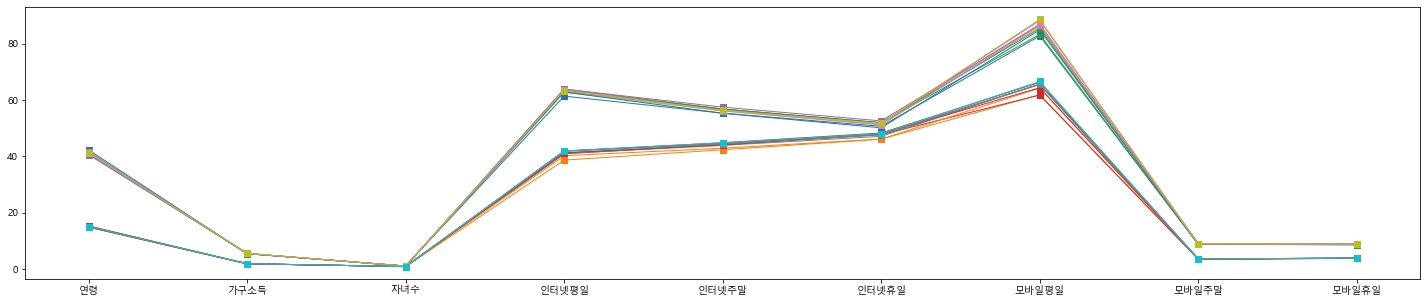

In [54]:
kf_10 = KFold(n_splits=10, random_state=1357)
chi_test =[]
for train, test in kf_10.split(df):
    chi_test.append(df.loc[train][num].mean().tolist())
    df.loc[train][num].mean().plot(lw=1, ls="-", marker = 's', figsize=(25,5))
    df.loc[train][num].std().plot(lw=1, ls="-", marker = 's', figsize=(25,5))

In [55]:
tf = pd.DataFrame(chi_test, columns=num)
tf

,연령,가구소득,자녀수,인터넷평일,인터넷주말,인터넷휴일,모바일평일,모바일주말,모바일휴일
0,41.714762,5.515430,1.163192,61.408090,55.360186,50.708709,82.746797,8.829591,8.717418
1,41.564637,5.572977,1.141507,63.108892,56.767805,51.946828,83.297049,8.871309,8.730921
2,40.803725,5.610787,1.118154,63.944105,56.816500,51.766933,88.281276,9.121736,9.021634
3,41.147345,5.642202,1.126772,62.864684,56.462515,51.794011,86.973790,9.035874,8.909813
4,41.532388,5.609675,1.134279,62.744355,56.185999,51.410630,86.036528,8.954436,8.815676
5,42.323325,5.565471,1.183486,62.878537,55.323920,50.180063,84.870797,8.898011,8.740361
6,41.333055,5.550181,1.142897,63.438292,56.833035,52.037052,85.408605,8.935413,8.789062
7,40.646192,5.616732,1.085881,63.883223,57.493551,52.627699,86.643865,9.045619,8.911410
8,41.549194,5.643969,1.137298,63.593664,56.163031,51.166058,86.524079,8.953520,8.808859
9,41.253474,5.659533,1.127571,63.383620,56.376533,51.721357,88.585740,9.105315,8.998144


In [56]:
from scipy.stats import chisquare
[chisquare(tf[col]) for col in tf.columns]



[Power_divergenceResult(statistic=0.04905695497510862, pvalue=0.9999999989384312),
 Power_divergenceResult(statistic=0.003445071513159542, pvalue=0.999999999999993),
 Power_divergenceResult(statistic=0.00533696532621455, pvalue=0.99999999999995),
 Power_divergenceResult(statistic=0.07686297445920974, pvalue=0.9999999920825192),
 Power_divergenceResult(statistic=0.07153447491547049, pvalue=0.9999999942571872),
 Power_divergenceResult(statistic=0.08618152512644309, pvalue=0.9999999868001264),
 Power_divergenceResult(statistic=0.3840418554473861, pvalue=0.9999902688119962),
 Power_divergenceResult(statistic=0.009747020281552323, pvalue=0.9999999999992506),
 Power_divergenceResult(statistic=0.012301046787195338, pvalue=0.9999999999978666)]

In [61]:
tf.iloc[1,0] = 100
chisquare(tf['연령'])

Power_divergenceResult(statistic=65.55182916735487, pvalue=1.1266630985657604e-10)

## End